In [168]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd 
from sklearn.metrics import accuracy_score

In [169]:
dataset = load_breast_cancer()
feature_names= dataset.feature_names

In [170]:
data = pd.DataFrame(dataset.data, columns=feature_names)
data['target'] = dataset.target

In [171]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [172]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.2,random_state=2)

In [173]:
## Feature scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
# Uniform KNN 
kNN = KNeighborsClassifier(n_neighbors=3)

In [175]:
kNN.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [176]:
y_pred = kNN.predict(X_test)

In [177]:
accuracy_score(y_test,y_pred)

0.9912280701754386

In [ ]:
## Elbow Curve of Normal KNN( hyperparameter tuning(manually))

scores = []

for i in range(1,16):

    kNN = KNeighborsClassifier(n_neighbors=i)

    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)

    scores.append(accuracy_score(y_test,y_pred))

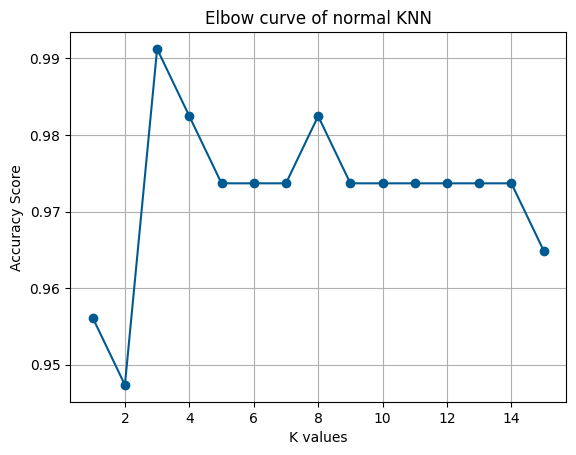

In [179]:
import matplotlib.pyplot as plt 

plt.plot(range(1,16),scores,marker='o',color='#005A92')
plt.title('Elbow curve of normal KNN')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.grid(True)

[[41  4]
 [ 0 69]]


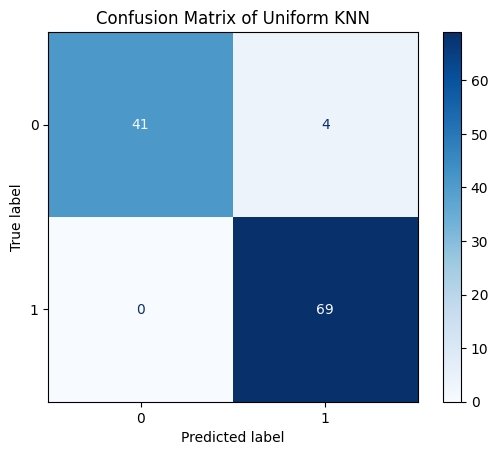

In [ ]:
## Confusion Matrix of uniform KNN

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix of Uniform KNN')
plt.show()

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.95      1.00      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
## cross val score for normal KNN

from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNN, X, y, cv=5)
print(scores.mean())
scores

0.9297314081664337


array([0.86842105, 0.93859649, 0.93859649, 0.95614035, 0.94690265])

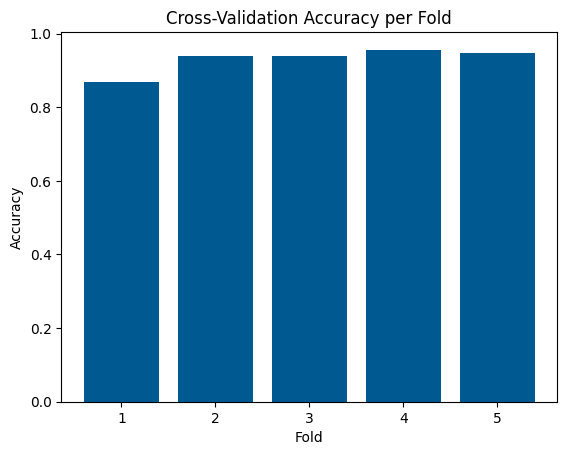

In [183]:

plt.bar(range(1,6),scores, color='#005A92')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.show()



In [ ]:
# Weighted KNN Implementation
W_knn = KNeighborsClassifier(n_neighbors=3,weights='distance')

In [185]:
W_knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [186]:
y_pred = W_knn.predict(X_test)

In [187]:
print(accuracy_score(y_test,y_pred))

0.9912280701754386


[[44  1]
 [ 0 69]]


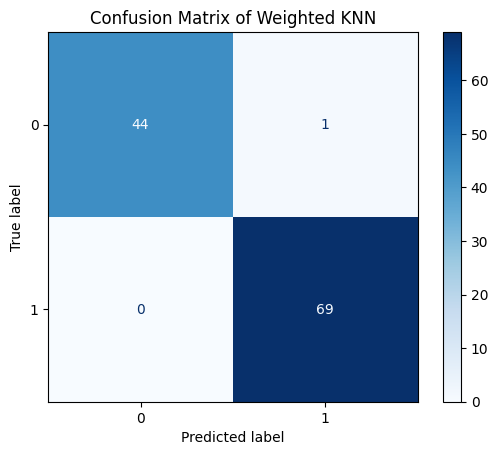

In [ ]:
## Confusion matrix of weighted KNN

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix of Weighted KNN')
plt.show()

In [ ]:
## Elbow curve for Weighted KNN 

scores = []

for i in range(1,16):

    kNN = KNeighborsClassifier(n_neighbors=i,weights='distance')

    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)

    scores.append(accuracy_score(y_test,y_pred))

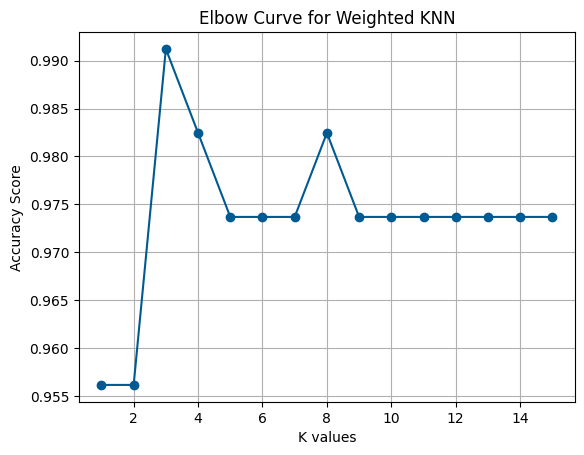

In [190]:
import matplotlib.pyplot as plt 

plt.plot(range(1,16),scores,marker='o',color='#005A92')
plt.title('Elbow Curve for Weighted KNN')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.grid(True)

In [ ]:
# Classification report of Weighted KNN 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [192]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(W_knn, X, y, cv=5)
print(scores.mean())
scores

0.9244216736531593


array([0.87719298, 0.92982456, 0.94736842, 0.94736842, 0.92035398])

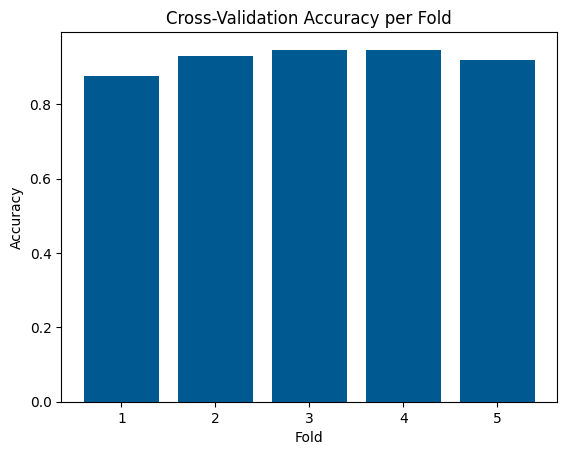

In [193]:
plt.bar(range(1,6),scores, color='#005A92')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.show()
